<a href="https://colab.research.google.com/github/medzumi/iot_transport/blob/master/data_set_creatingV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from numpy import linalg as ln
from sklearn.model_selection import StratifiedKFold
%pylab inline

Populating the interactive namespace from numpy and matplotlib


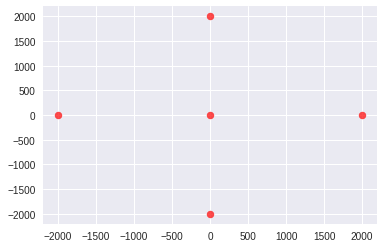

In [0]:
number = 350
coord_region = np.array([[0, 0], [-2000, 0], [2000, 0], [0, 2000], [0, -2000]])
pl.scatter(coord_region[:, 0], coord_region[:,1], c='red', s=50, alpha=0.7)

In [0]:
point = np.random.normal(0, 100, (number, 2))
for i in range(1, 5):
    point = np.vstack((point, np.dstack((np.random.normal(coord_region[i][0], 100, number), np.random.normal(coord_region[i][1], 100, number)))[0]))


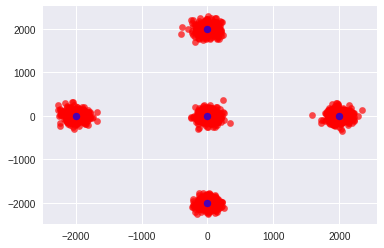

In [0]:
pl.scatter(point[:, 0], point[:,1], c='red', s=40, alpha=0.7)    
pl.scatter(coord_region[:, 0], coord_region[:,1], c='blue', s=50, alpha=0.7)

In [0]:
data = pd.DataFrame({'x':point[:,0], 'y':point[:,1], 'time':np.zeros(number*5), 'obj_id':[i for i in range(number*5)], 'v':np.zeros(number*5)})

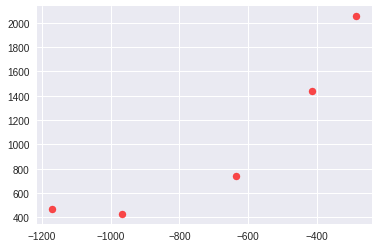

In [0]:
data_region_point_1 = pd.DataFrame({'x':np.random.normal(-1000, 500, 5), 'y':np.random.normal(1000, 500, 5)})
pl.scatter(data_region_point_1['x'][:], data_region_point_1['y'][:], c='red', s=50, alpha=0.7)

In [0]:
a = np.array([[data_region_point_1['x'][i], data_region_point_1['y'][i]] for i in data_region_point_1.index])

In [0]:
j = 0
timeline_dif = 600
err = np.random.normal
cont = len(data['obj_id'].value_counts().index)
for i in data['obj_id'].value_counts().index:
    t_start = data['time'][data['obj_id'] == i].max()
    j += 1
    t = t_start
    const = np.random.randint(t+600, t+18000)
    const = int((const - t_start)/timeline_dif)
    sys.stdout.write("\rObject_id = {}".format(j/cont))
    data_par = pd.DataFrame({'x':[np.array(data['x'][(data['time'] == t_start) & (data['obj_id'] == i)])[0] + err(0, 1/6) for k in range(const)], 
                             'y':[np.array(data['y'][(data['time'] == t_start) & (data['obj_id'] == i)])[0] + err(0, 1/6) for k in range(const)], 
                             'time':[t_start + k*timeline_dif for k in range(1, const+1)],
                            'v':[err(0, 1/7) for k in range(const)],
                            'obj_id':[i for k in range(const)]})
    data = data.append(data_par, ignore_index = True)



Object_id = 1.0

In [0]:
classes = np.random.randint(0, 5, number*5)

In [0]:
j = 0
for i in data['obj_id'].value_counts().index:
    point_to = np.random.normal(a[classes[i]], 100, (1, 2))[0]
    j +=1
    t_start = data['time'][data['obj_id'] == i].max()
    point_start = np.array(data[['x', 'y']][(data['obj_id'] == i) & (data['time'] == t_start)])[0]
    vector = (point_to - point_start)/6 #добираются по часу
    v = ln.norm(vector)
    data_par = np.array([[point_start[0]+k*vector[0], point_start[1] + k*vector[1], t_start + k*timeline_dif, v, i] for k in range(1, 7)])
    data = data.append(pd.DataFrame({'x' : data_par[:,0], 'y': data_par[:,1], 'time':data_par[:,2], 'v': data_par[:,3], 'obj_id': data_par[:,4]}), ignore_index = True)
    sys.stdout.write("\rObject_id = {}".format(j/cont))
    

Object_id = 1.0

In [0]:
data[data['obj_id'] == 0]

,obj_id,time,v,x,y
0,0.0,0.0,0.000000,-112.760270,18.855327
28870,0.0,600.0,0.047992,-112.878387,19.008016
28871,0.0,1200.0,-0.155671,-112.878342,18.769011
28872,0.0,1800.0,0.256469,-112.240853,18.757560
28873,0.0,2400.0,-0.103129,-112.384280,19.045395
28874,0.0,3000.0,0.142977,-112.641051,18.834083
28875,0.0,3600.0,-0.075270,-112.811692,18.743425
28876,0.0,4200.0,-0.046979,-112.877630,18.792589
28877,0.0,4800.0,0.146491,-112.822012,18.458766
28878,0.0,5400.0,-0.287050,-112.594527,18.773890


In [0]:
j = 0
timeline_dif = 600
err = np.random.normal
cont = len(data['obj_id'].value_counts().index)
for i in data['obj_id'].value_counts().index:
    t_start = data['time'][data['obj_id'] == i].max()
    j += 1
    t = t_start
    const = np.random.randint(t+28800, t+36000)
    const = int((const - t_start)/timeline_dif)
    sys.stdout.write("\rObject_id = {}".format(j/cont))
    data_par = pd.DataFrame({'x':[np.array(data['x'][(data['time'] == t_start) & (data['obj_id'] == i)])[0] + err(0, 1/6) for k in range(const)], 
                             'y':[np.array(data['y'][(data['time'] == t_start) & (data['obj_id'] == i)])[0] + err(0, 1/6) for k in range(const)], 
                             'time':[t_start + k*timeline_dif for k in range(1, const+1)],
                            'v':[err(0, 1/7) for k in range(const)],
                            'obj_id':[i for k in range(const)]})
    data = data.append(data_par, ignore_index = True)

Object_id = 1.0

In [0]:
j = 0
for i in data['obj_id'].value_counts().index:
    point_to = np.array(data[['x', 'y']][(data['obj_id'] == i) & (data['time'] == 0)])[0]
    j +=1
    t_start = data['time'][data['obj_id'] == i].max()
    point_start = np.array(data[['x', 'y']][(data['obj_id'] == i) & (data['time'] == t_start)])[0]
    vector = (point_to - point_start)/6 #добираются по часу
    v = ln.norm(vector)
    data_par = np.array([[point_start[0]+k*vector[0] + err(0,1/6), point_start[1] + k*vector[1]+err(0,1/6), t_start + k*timeline_dif, v, i] for k in range(1, 7)])
    data = data.append(pd.DataFrame({'x' : data_par[:,0], 'y': data_par[:,1], 'time':data_par[:,2], 'v': data_par[:,3], 'obj_id': data_par[:,4]}), ignore_index = True)
    sys.stdout.write("\rObject_id = {}".format(j/cont))

Object_id = 1.0

In [0]:
j = 0
timeline_dif = 600
err = np.random.normal
cont = len(data['obj_id'].value_counts().index)
for i in data['obj_id'].value_counts().index:
    t_start = data['time'][data['obj_id'] == i].max()
    j += 1
    t = t_start
    const = 86400
    const = int((const - t_start)/timeline_dif)
    sys.stdout.write("\rObject_id = {}".format(j/cont))
    data_par = pd.DataFrame({'x':[np.array(data['x'][(data['time'] == t_start) & (data['obj_id'] == i)])[0] + err(0, 1/6) for k in range(const)], 
                             'y':[np.array(data['y'][(data['time'] == t_start) & (data['obj_id'] == i)])[0] + err(0, 1/6) for k in range(const)], 
                             'time':[t_start + k*timeline_dif for k in range(1,const+1)],
                            'v':[err(0, 1/7) for k in range(const)],
                            'obj_id':[i for k in range(const)]})
    data = data.append(data_par, ignore_index = True)

Object_id = 1.0

In [0]:
part = 20
kod = int(len(data['obj_id'].value_counts().index)/part)
knd = len(data['obj_id'].value_counts().index) % part
for i in range(part-1):
  data_save = data[(data['obj_id']>=i*kod) &(data['obj_id'] <(i+1)*kod)]
  data_save.to_csv('dataV3P{}.csv'.format(i), sep=',', encoding='utf-8', index=False)
data_save = data[(data['obj_id'] >=(part-1)*kod) &(data['obj_id'] < part*kod + knd)]
data_save.to_csv('dataV3P{}.csv'.format(part-1), sep=',', encoding='utf-8', index=False)
  


In [0]:
print(kod)

87


In [0]:
data[:][data['obj_id'] == 0]

,x,y,time,obj_id
0,13.955757,-34.681830,0.0,0
39714,13.890912,-34.742892,600.0,0
39715,14.012803,-34.640044,1200.0,0
39716,13.734392,-35.029799,1800.0,0
39717,14.121083,-34.494967,2400.0,0
39718,14.194832,-34.662899,3000.0,0
39719,14.013263,-34.836794,3600.0,0
39720,13.954960,-34.285966,4200.0,0
39721,14.064008,-34.575798,4800.0,0
39722,14.122487,-34.489241,5400.0,0


In [0]:
data = pd.read_csv('dataV1.1.csv', sep = ',', encoding = 'utf-8')

In [0]:
data[:]

,x,y,time,obj_id
0,-10.154920,-21.160040,0.0,0
1,43.515648,-35.756244,0.0,1
2,-16.705938,11.201334,0.0,2
3,41.308330,-54.348051,0.0,3
4,67.187793,-43.349094,0.0,4
5,-22.553222,6.581393,0.0,5
6,50.076328,33.391458,0.0,6
7,2.556388,-24.175841,0.0,7
8,-43.462778,24.031495,0.0,8
9,0.357077,18.535597,0.0,9


In [0]:
data['v'] = 0


In [0]:
j = 0
for i in data['obj_id'].value_counts().index:
    time = 0
    j += 1
    while ( time < 85800 ):
        data['v'][(data['obj_id'] == i) & (data['time'] == time +600)] = ln.norm(np.array(data[['x', 'y']][(data['obj_id'] ==i) & (data['time']==time)]) - np.array(data[['x', 'y']][(data['obj_id'] ==i) & (data['time']==time+600)]))/600
        sys.stdout.write("\rPercent = {}, time ={}".format(j/2500, time))
        time += 600
    sys.stdout.write("\rPercent = {}".format(j/250))

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Percent = 0.0116, time =52800

In [0]:
data.to_csv('dataV1.1.csv', sep = ',', encoding = 'utf-8', index = False)